In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[8,3]

In [2]:
train=pd.read_csv('customer_churn.csv')
train.shape

(64374, 12)

In [3]:
test=pd.read_csv('customer_churn.csv')
test.shape

(64374, 12)

In [4]:
train.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [5]:
test.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [6]:
from sklearn.pipeline import Pipeline

In [7]:
def drop_cols(df,col):
    df=df.drop(col,axis=1)
    return df

In [8]:
train=drop_cols(train,"CustomerID")
train.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [9]:
test=drop_cols(test,"CustomerID")
test.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [10]:
df=pd.concat([train,test],axis=0)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [11]:
df=df.dropna()
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [12]:
df.shape

(128748, 11)

In [13]:
def categorical_visualization(col):
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=df)
    plt.subplot(1,2,2)
    df[col].value_counts().plot(kind='pie',autopct='%0.2f%%')
    plt.tight_layout()
    plt.show()
    
    
def numerical_visualization(col):
    plt.subplot(1,2,1)
    sns.kdeplot(x=col,data=df)
    plt.grid()
    plt.subplot(1,2,2)
    sns.boxplot(x=col,data=df)
    plt.tight_layout()
    plt.show()

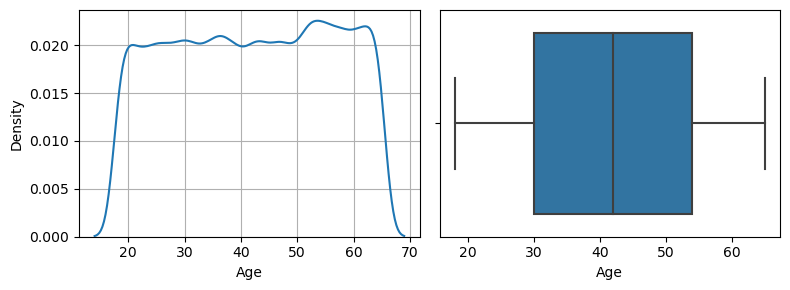

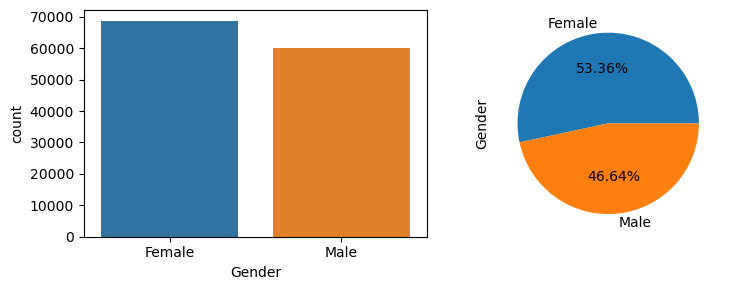

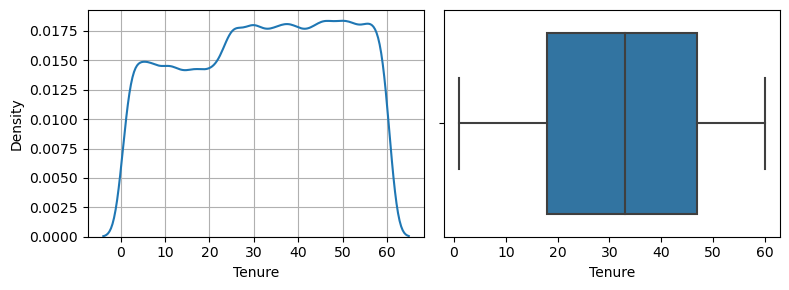

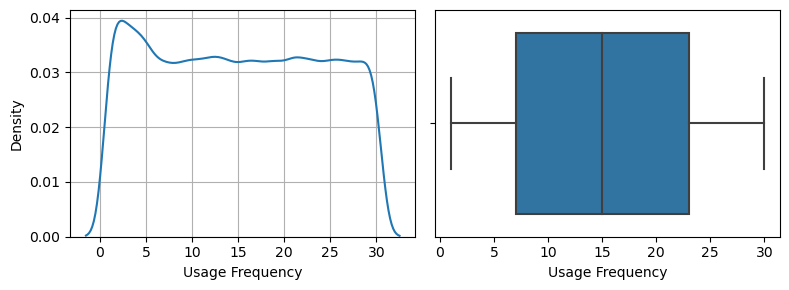

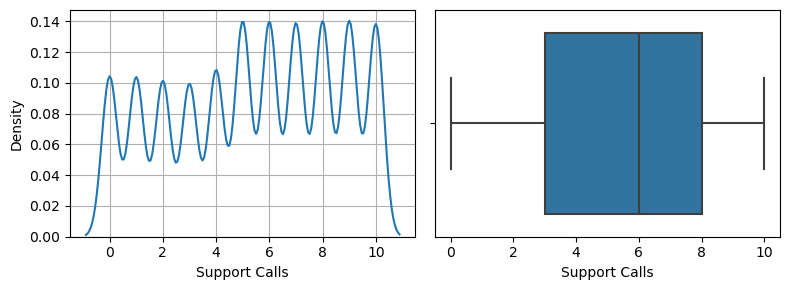

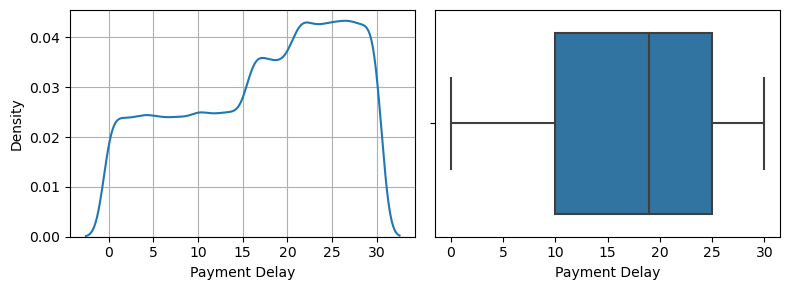

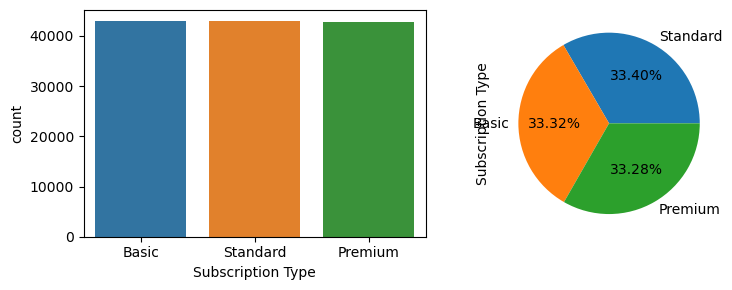

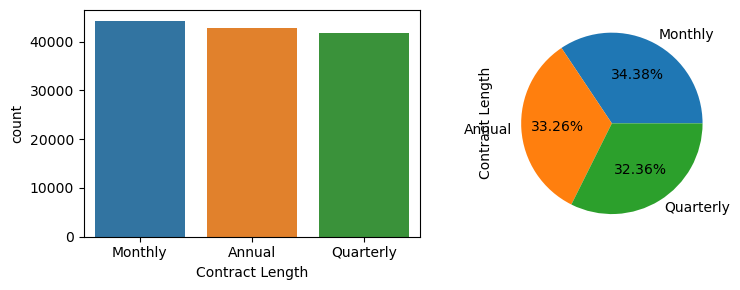

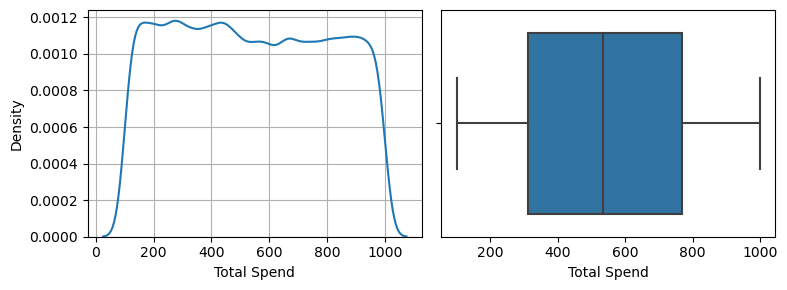

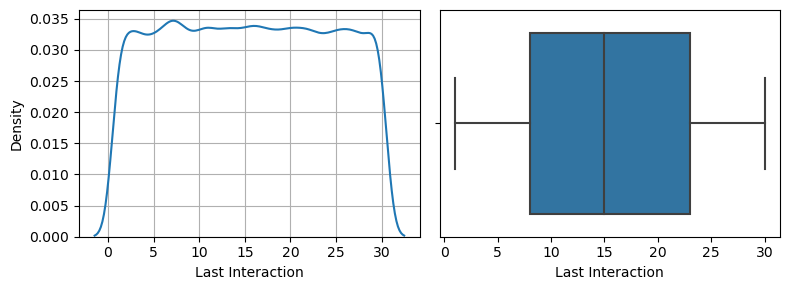

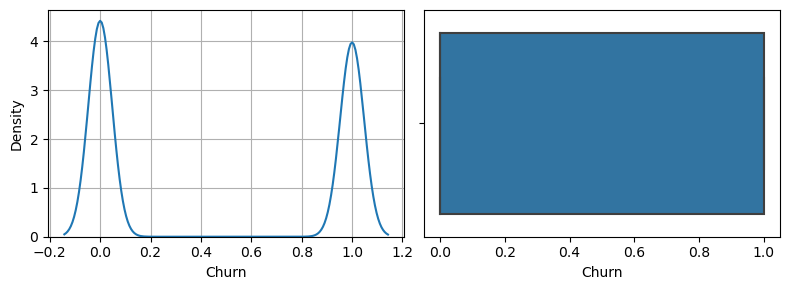

In [14]:
for i in df.columns:
    if df[i].dtype=='object':
        categorical_visualization(i)
    else:
        numerical_visualization(i)

In [15]:
df.select_dtypes(include='object')

,Gender,Subscription Type,Contract Length
0,Female,Basic,Monthly
1,Female,Standard,Monthly
2,Male,Premium,Annual
3,Male,Premium,Quarterly
4,Female,Standard,Annual
...,...,...,...
64369,Female,Basic,Quarterly
64370,Male,Standard,Annual
64371,Male,Premium,Monthly
64372,Female,Standard,Monthly


In [16]:
y=df['Churn']
x=df.drop('Churn',axis=1)

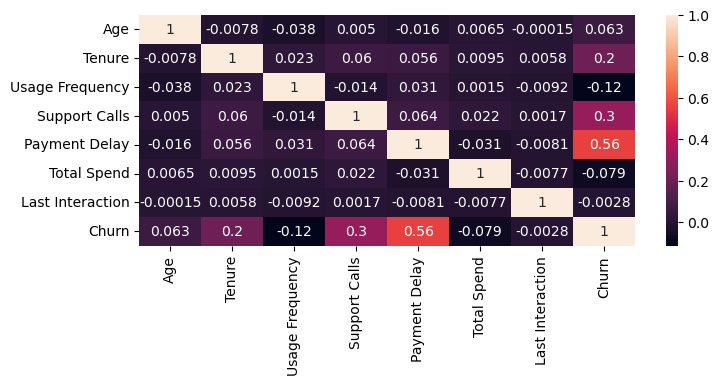

In [17]:
sns.heatmap(df.select_dtypes(exclude='object').corr(),annot=True)
plt.show()

In [18]:
for i in x.select_dtypes(include='object').columns:
    #print(f"For {i}:")
    print(x[i].value_counts())
    print("\n")

Female    68706
Male      60042
Name: Gender, dtype: int64


Standard    43004
Basic       42902
Premium     42842
Name: Subscription Type, dtype: int64


Monthly      44260
Annual       42820
Quarterly    41668
Name: Contract Length, dtype: int64




In [19]:
for i in x.select_dtypes(include='object').columns:
    x[i]=x[i].map(x[i].value_counts(normalize=True))

In [20]:
x.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,0.533647,25,14,4,27,0.333225,0.343772,598,9
1,41,0.533647,28,28,7,13,0.334017,0.343772,584,20
2,47,0.466353,27,10,2,29,0.332759,0.332588,757,21
3,35,0.466353,9,12,5,17,0.332759,0.323640,232,18
4,53,0.533647,58,24,9,2,0.334017,0.332588,533,18


<Axes: >

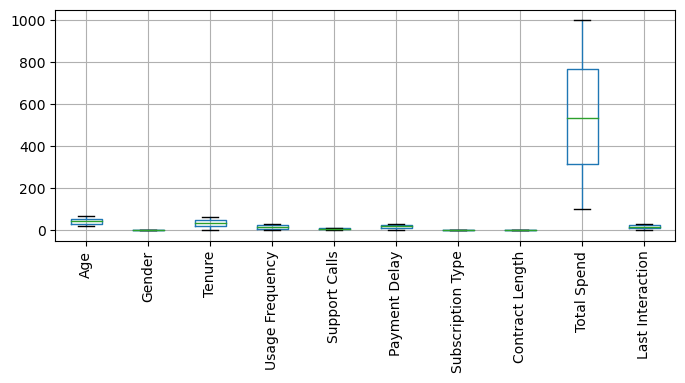

In [21]:
x.boxplot(rot=90)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
mmax=MinMaxScaler()

In [24]:
x[['Age','Tenure', 'Usage Frequency', 'Support Calls','Payment Delay','Total Spend','Last Interaction']]=mmax.fit_transform(x[['Age','Tenure', 'Usage Frequency', 'Support Calls','Payment Delay','Total Spend','Last Interaction']])
x.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,0.085106,0.533647,0.406780,0.448276,0.4,0.900000,0.333225,0.343772,0.553333,0.275862
1,0.489362,0.533647,0.457627,0.931034,0.7,0.433333,0.334017,0.343772,0.537778,0.655172
2,0.617021,0.466353,0.440678,0.310345,0.2,0.966667,0.332759,0.332588,0.730000,0.689655
3,0.361702,0.466353,0.135593,0.379310,0.5,0.566667,0.332759,0.323640,0.146667,0.586207
4,0.744681,0.533647,0.966102,0.793103,0.9,0.066667,0.334017,0.332588,0.481111,0.586207


In [25]:
x.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')

<Axes: >

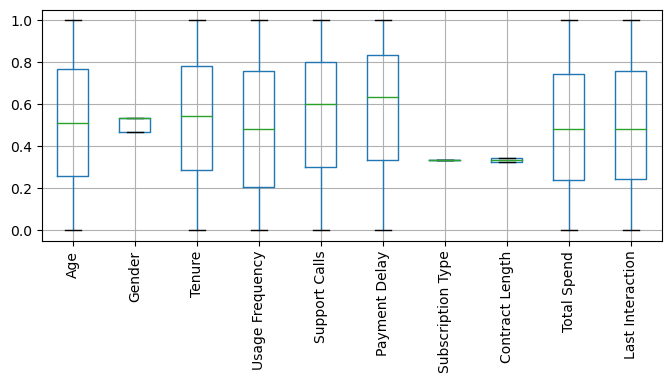

In [26]:
x.boxplot(rot=90)

In [27]:
y.value_counts()

0    67762
1    60986
Name: Churn, dtype: int64

In [28]:
y.shape[0]

128748

In [29]:
x.shape[0]

128748

In [30]:
import statsmodels.api as sm

In [31]:
xc=sm.add_constant(x)
model=sm.Logit(y,xc).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.392990
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:               128748
Model:                          Logit   Df Residuals:                   128737
Method:                           MLE   Df Model:                           10
Date:                Sun, 29 Sep 2024   Pseudo R-squ.:                  0.4319
Time:                        18:43:16   Log-Likelihood:                -50597.
converged:                       True   LL-Null:                       -89063.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -28.9303      5.064     -5.713      0.000     -38.856     -19.005
Age     

In [32]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=42)

In [33]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [35]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [36]:
def predictor(model_name):    
    print("For the {}".format(model_name))    
    model_name.fit(xtrain,ytrain)    
    y_pred_train = model_name.predict(xtrain)    
    y_pred_test = model_name.predict(xtest)    
    print("The TRAIN accuracy is",accuracy_score(ytrain,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(ytrain,y_pred_train))    
    fpr,tpr,thresholds = roc_curve(ytrain,model_name.predict_proba(xtrain)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()    
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(ytest,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(ytest,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(ytest,model_name.predict_proba(xtest)[:,1])   
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

For the LogisticRegression()
The TRAIN accuracy is 0.8261487078770126
The ROC score for TRAIN data is 0.8262665018236048


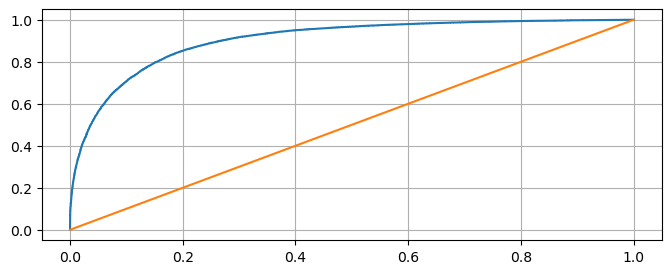

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.8273139158576052
The ROC score for TEST data is 0.8275442703984394


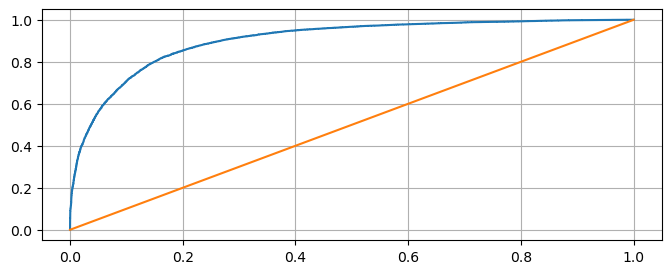

In [37]:
predictor(lr)

For the DecisionTreeClassifier()
The TRAIN accuracy is 1.0
The ROC score for TRAIN data is 1.0


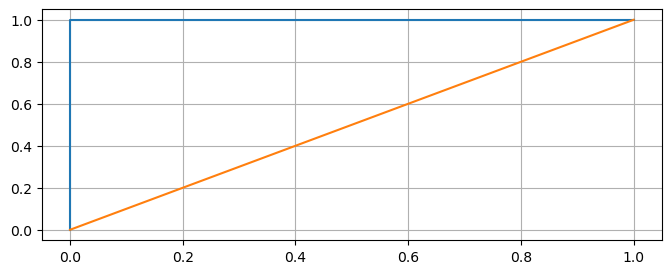

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.9996375404530744
The ROC score for TEST data is 0.9996335874362828


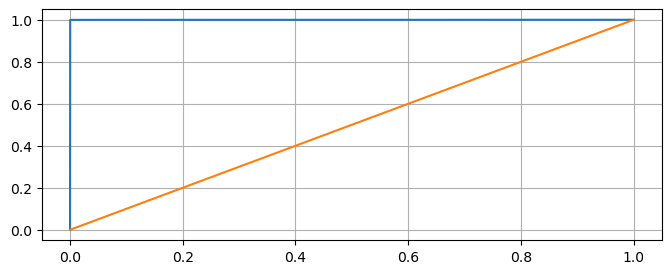

In [38]:
predictor(dt)

For the GaussianNB()
The TRAIN accuracy is 0.8394305560178866
The ROC score for TRAIN data is 0.8407826395291577


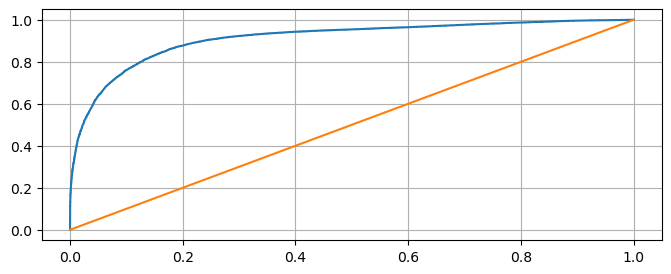

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.8395080906148867
The ROC score for TEST data is 0.8409814976190915


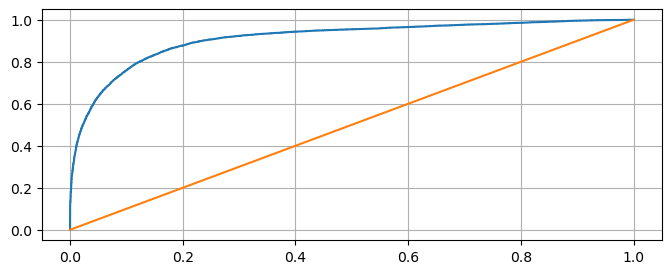

In [39]:
predictor(gnb)

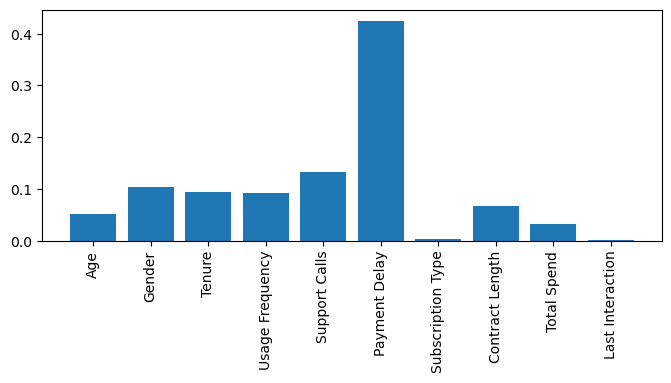

In [40]:
plt.bar(xtrain.columns,dt.fit(xtrain,ytrain).feature_importances_)
plt.xticks(rotation=90)
plt.show()